In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passangers-booking-data/AirlineScrappedReview.csv
/kaggle/input/airline-passangers-booking-data/Customer_comment.csv
/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv
/kaggle/input/airline-passangers-booking-data/Survey data_Inflight Satisfaction Score.csv


# ✈️ Passenger Booking Dataset Overview

This dataset contains detailed information about passenger flight bookings and preferences. It is designed to help analyze booking patterns, customer behavior, and key factors influencing booking completion and flight choices.

---

## 📊 Dataset Summary

- **Total Records:** 50,002  
- **Total Columns:** 14  
- **File Size:** ~5.3 MB  
- **Data Types:**  
  - Integer: 8 columns  
  - Float: 1 column  
  - Object (String): 5 columns  

---

## 🧱 Column Descriptions

| **Column Name** | **Description** | **Data Type** | **Example Value** |
|------------------|-----------------|----------------|-------------------|
| `num_passengers` | Number of passengers included in the booking. | `int64` | `2` |
| `sales_channel` | Source or platform through which the booking was made (e.g., Internet, Mobile). | `object` | `Internet` |
| `trip_type` | Indicates whether the trip is a one-way or round trip. | `object` | `RoundTrip` |
| `purchase_lead` | Number of days between the booking date and the travel date. | `int64` | `21` |
| `length_of_stay` | Duration (in days) between arrival and departure. | `int64` | `12` |
| `flight_hour` | Hour of the day when the flight departs (0–23). | `int64` | `6` |
| `flight_day` | Day of the week on which the flight is scheduled. | `object` | `Tue` |
| `route` | Flight route, typically represented by origin and destination airport codes. | `object` | `AKLHGH` |
| `booking_origin` | Country or region from where the booking was made. | `object` | `New Zealand` |
| `wants_extra_baggage` | Whether the passenger requested extra baggage (1 = Yes, 0 = No). | `int64` | `1` |
| `wants_preferred_seat` | Whether the passenger requested a preferred seat (1 = Yes, 0 = No). | `int64` | `0` |
| `wants_in_flight_meals` | Whether the passenger requested in-flight meals (1 = Yes, 0 = No). | `int64` | `1` |
| `flight_duration` | Duration of the flight in hours. | `float64` | `5.52` |
| `booking_complete` | Indicates if the booking was completed (1 = Yes, 0 = No). | `int64` | `1` |

---

## 📈 Insights & Usage

- This dataset can be used for **predictive modeling**, such as forecasting booking completion likelihood or understanding **customer preferences**.  
- It supports **data visualization** of flight trends, sales channel performance, and **travel behavior patterns**.  
- Ideal for **machine learning** tasks like:
  - Booking completion prediction  
  - Customer segmentation  
  - Trip planning optimization  

---

## 🧹 Notes for Data Cleaning

- Check for **categorical encoding** (e.g., `sales_channel`, `trip_type`, `booking_origin`).  
- Normalize binary columns (`wants_extra_baggage`, `booking_complete`) to ensure consistent types.  
- Standardize time-related features (`flight_hour`, `flight_day`) for temporal analysis.  

---

## 💡 Summary

This dataset provides a comprehensive view of the flight booking process, customer choices, and travel habits. It serves as an excellent foundation for **data analysis, feature engineering, and model development** in the airline and travel industries.


# Loading the dataset into a dataframe

In [35]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/kaggle/input/airline-passangers-booking-data/Passanger_booking_data.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


# Data exploration

In [36]:
# Calculate the number of rows in the DataFrame
num_rows = df.shape[0]

# Print the number of rows
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 50002


In [37]:
# Check for null values in each column and sum them up
null_counts = df.isnull().sum()

# Print the number of null values per column
print("Number of null values per column:")
print(null_counts)

Number of null values per column:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [38]:
# Count the total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 719 duplicate rows in the dataset.


In [39]:
# Display the duplicate rows
df[df.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
198,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
318,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
386,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
458,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
515,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49854,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49904,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49936,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49946,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [40]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [41]:
# Count the total number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'There are {duplicate_count} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


In [42]:
# Calculate the number of rows in the DataFrame
num_rows = df.shape[0]

# Print the number of rows
print(f"The number of rows in the dataset is: {num_rows}")

The number of rows in the dataset is: 49283


Value counts for 'sales_channel':
sales_channel
Internet    43918
Mobile       5365
Name: count, dtype: int64




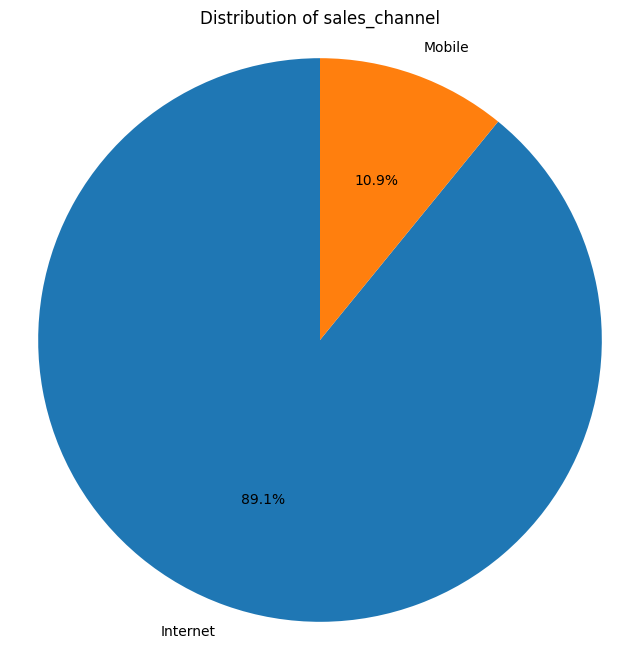

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'sales_channel'
sales_channel_counts = df['sales_channel'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = sales_channel_counts.sum()
threshold = total * 0.05
sales_channel_counts_filtered = sales_channel_counts[sales_channel_counts >= threshold]
others_count = sales_channel_counts[sales_channel_counts < threshold].sum()

if others_count > 0:
    sales_channel_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'sales_channel':")
print(sales_channel_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales_channel_counts_filtered, labels=sales_channel_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of sales_channel')
plt.show()

## Categorical Columns

### Distribution of sales_channel

This bar chart shows the distribution of bookings across different sales channels.

Value counts for 'sales_channel':
sales_channel
Internet    43918
Mobile       5365
Name: count, dtype: int64




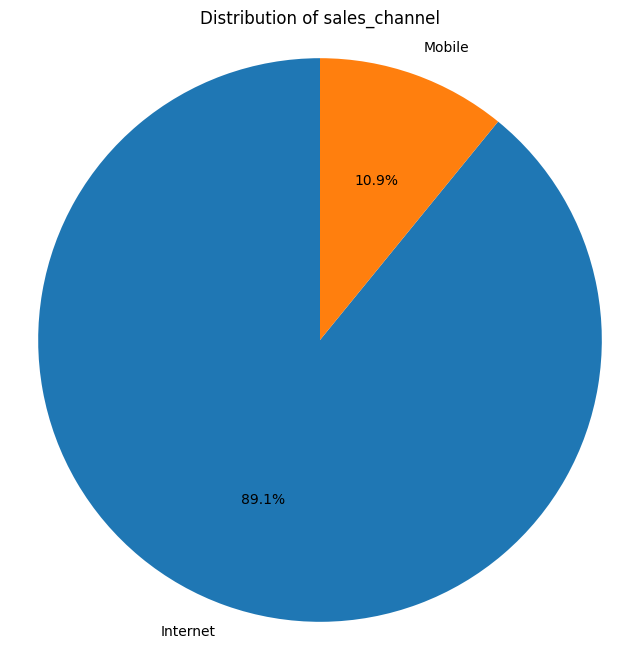

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'sales_channel'
sales_channel_counts = df['sales_channel'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = sales_channel_counts.sum()
threshold = total * 0.05
sales_channel_counts_filtered = sales_channel_counts[sales_channel_counts >= threshold]
others_count = sales_channel_counts[sales_channel_counts < threshold].sum()

if others_count > 0:
    sales_channel_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'sales_channel':")
print(sales_channel_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sales_channel_counts_filtered, labels=sales_channel_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of sales_channel')
plt.show()

### Distribution of trip_type

This pie chart visualizes the distribution of different trip types (e.g., RoundTrip, OneWay).

Value counts for 'trip_type':
trip_type
RoundTrip     48780
OneWay          386
CircleTrip      117
Name: count, dtype: int64




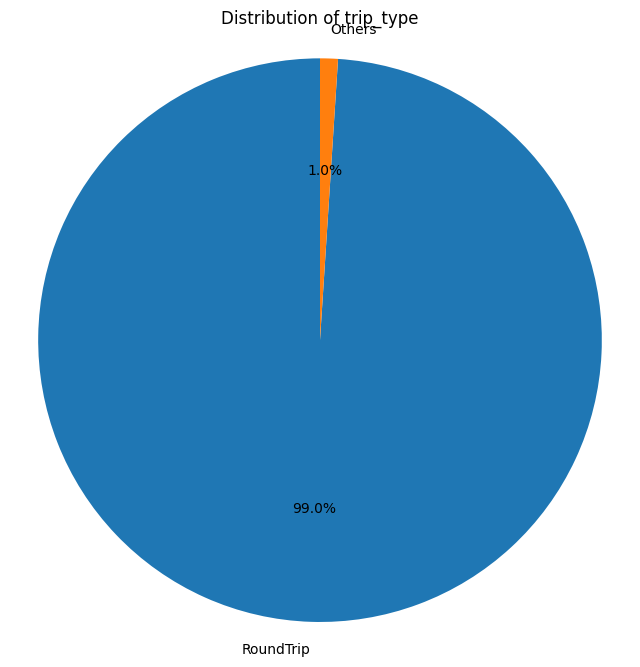

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'trip_type'
trip_type_counts = df['trip_type'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = trip_type_counts.sum()
threshold = total * 0.05
trip_type_counts_filtered = trip_type_counts[trip_type_counts >= threshold]
others_count = trip_type_counts[trip_type_counts < threshold].sum()

if others_count > 0:
    trip_type_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'trip_type':")
print(trip_type_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(trip_type_counts_filtered, labels=trip_type_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of trip_type')
plt.show()

### Distribution of flight_day

This pie chart shows the distribution of bookings across different days of the week.

Value counts for 'flight_day':
flight_day
Mon    7988
Wed    7563
Tue    7559
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64




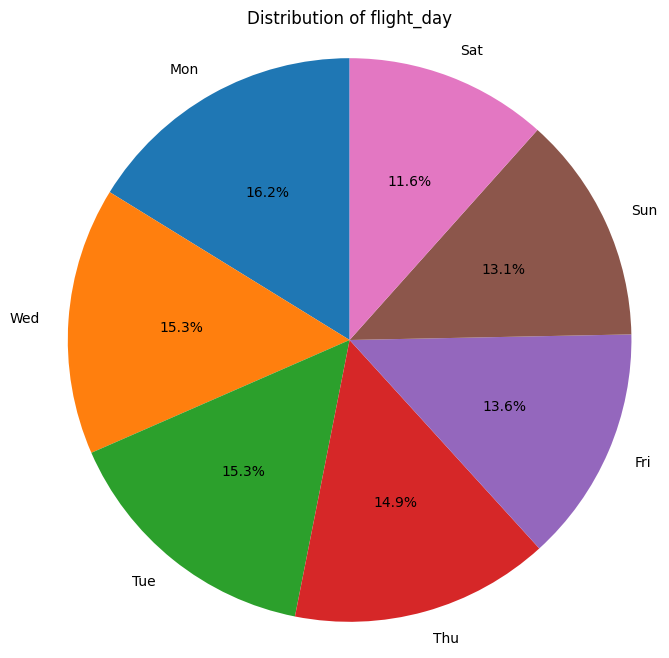

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'flight_day'
flight_day_counts = df['flight_day'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = flight_day_counts.sum()
threshold = total * 0.05
flight_day_counts_filtered = flight_day_counts[flight_day_counts >= threshold]
others_count = flight_day_counts[flight_day_counts < threshold].sum()

if others_count > 0:
    flight_day_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'flight_day':")
print(flight_day_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(flight_day_counts_filtered, labels=flight_day_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of flight_day')
plt.show()

### Distribution of route

This pie chart represents the distribution of bookings across different flight routes.

Value counts for 'route':
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
JEDPEN       1
JOGKTM       1
DACPEK       1
DACMRU       1
MRUXIY       1
Name: count, Length: 799, dtype: int64




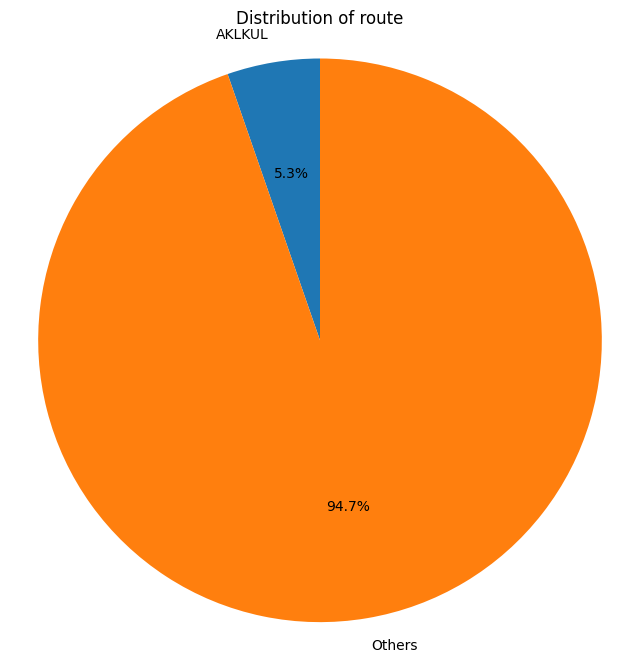

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'route'
route_counts = df['route'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = route_counts.sum()
threshold = total * 0.05
route_counts_filtered = route_counts[route_counts >= threshold]
others_count = route_counts[route_counts < threshold].sum()

if others_count > 0:
    route_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'route':")
print(route_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(route_counts_filtered, labels=route_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of route')
plt.show()

### Distribution of booking_origin

This pie chart illustrates the distribution of bookings based on the country or region of origin.

Value counts for 'booking_origin':
booking_origin
Australia               17692
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Tanzania                    1
Jordan                      1
Lebanon                     1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64




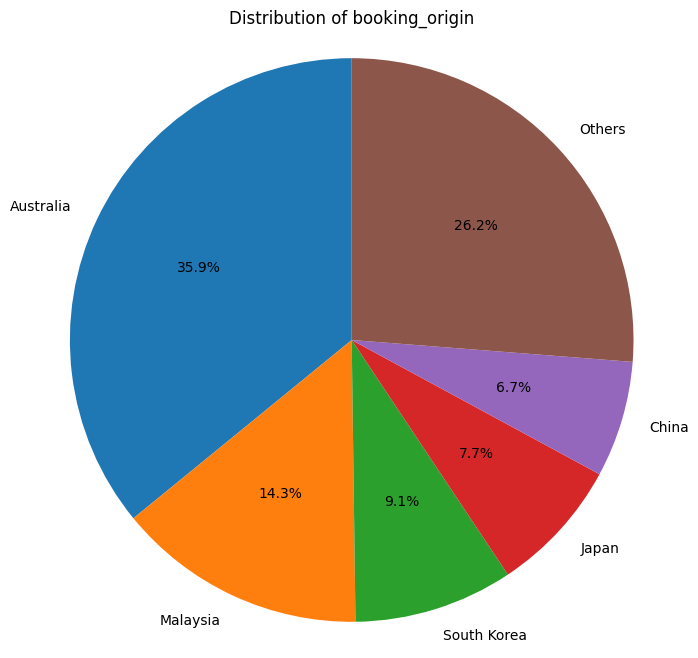

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Get value counts for 'booking_origin'
booking_origin_counts = df['booking_origin'].value_counts()

# Calculate percentages and group small categories into 'Others'
total = booking_origin_counts.sum()
threshold = total * 0.05
booking_origin_counts_filtered = booking_origin_counts[booking_origin_counts >= threshold]
others_count = booking_origin_counts[booking_origin_counts < threshold].sum()

if others_count > 0:
    booking_origin_counts_filtered['Others'] = others_count

# Print value counts
print("Value counts for 'booking_origin':")
print(booking_origin_counts)
print("\n")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(booking_origin_counts_filtered, labels=booking_origin_counts_filtered.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of booking_origin')
plt.show()

# Data preprocessing

## Categorical columns

### One-Hot Encoding for 'trip_type' Column

One-hot encoding is a technique used to convert categorical variables into a numerical format that can be easily used by machine learning algorithms. In this case, we will apply one-hot encoding to the `trip_type` column.

The `trip_type` column has three unique values: 'RoundTrip', 'OneWay', and 'CircleTrip'. One-hot encoding will create new binary columns for each unique value. For example, if a row has 'RoundTrip' as the `trip_type`, the 'RoundTrip' column will have a value of 1, and the 'OneWay' and 'CircleTrip' columns will have a value of 0.

This process allows the model to interpret the categorical data without assuming any ordinal relationship between the categories.

In [49]:
# Apply one-hot encoding to the 'trip_type' column
df = pd.get_dummies(df, columns=['trip_type'], prefix='trip_type')

# Display the first 5 rows of the DataFrame to show the new columns
display(df.head())

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,Internet,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,False,False,True
1,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,False,False,True
2,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,False,False,True
3,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,False,False,True
4,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,False,False,True


### Label Encoding for 'sales_channel' Column

Label encoding is a technique used to convert categorical labels into numerical form. In this case, since the `sales_channel` column has only two unique values ('Internet' and 'Mobile'), we can use label encoding to convert them into 0 and 1. This is suitable for binary categorical variables.

We will use the `LabelEncoder` from the `sklearn.preprocessing` library to perform this encoding.

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sales_channel' column in-place
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])

# Display the first 5 rows of the DataFrame to show the changes
display(df.head())

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,1,0,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1,False,False,True
1,2,0,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,False,False,True
2,1,0,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,False,False,True
3,2,0,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,False,False,True
4,1,0,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,False,False,True


### Cyclic Encoding for 'flight_day'

The 'flight_day' column represents the day of the week, which is a cyclical feature (e.g., Monday follows Sunday). Standard numerical encoding might imply an incorrect linear relationship between the days. Cyclic encoding addresses this by transforming the day of the week into two new features using sine and cosine functions.

We can represent each day of the week as a point on a circle. The sine and cosine of the angle corresponding to each day will provide two values that capture the cyclical nature. For example, Monday and Sunday will be closer to each other in the encoded space than Monday and Wednesday.

To implement this, we first need to convert the 'flight\_day' into a numerical representation (0-6 for Monday to Sunday, for example). Then, we apply the sine and cosine transformations:

- Sine component: `sin(2 * pi * day_of_week / 7)`
- Cosine component: `cos(2 * pi * day_of_week / 7)`

These two new features, often named 'flight\_day\_sin' and 'flight\_day\_cos', represent the cyclical nature of the day of the week and can be used in machine learning models.

In [51]:
# Create a mapping for the days of the week to numbers (Monday=0, Sunday=6)
day_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
df['flight_day_numeric'] = df['flight_day'].map(day_mapping)

# Apply cyclic encoding
df['flight_day_sin'] = np.sin(2 * np.pi * df['flight_day_numeric'] / 7)
df['flight_day_cos'] = np.cos(2 * np.pi * df['flight_day_numeric'] / 7)

# Display the new columns
display(df[['flight_day', 'flight_day_numeric', 'flight_day_sin', 'flight_day_cos']].head())

,flight_day,flight_day_numeric,flight_day_sin,flight_day_cos
0,Tue,1,0.781831,0.623490
1,Sat,5,-0.974928,-0.222521
2,Sat,5,-0.974928,-0.222521
3,Wed,2,0.974928,-0.222521
4,Sat,5,-0.974928,-0.222521


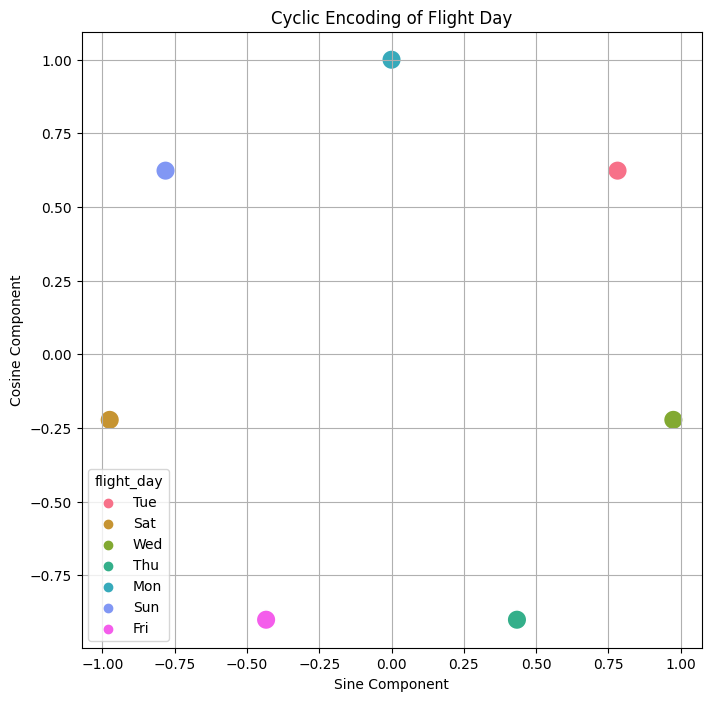

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the cyclic encoding
plt.figure(figsize=(8, 8))
sns.scatterplot(x='flight_day_sin', y='flight_day_cos', data=df, hue='flight_day', palette='husl', s=200) # Changed palette to 'husl'
plt.title('Cyclic Encoding of Flight Day')
plt.xlabel('Sine Component')
plt.ylabel('Cosine Component')
plt.grid(True)
plt.show()

In [53]:
# Drop the original 'flight_day' column
df = df.drop('flight_day', axis=1)

# Display the first 5 rows to confirm the column is dropped
display(df.head())

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_numeric,flight_day_sin,flight_day_cos
0,1,0,21,12,6,AKLHGH,Australia,0,0,0,7.21,1,False,False,True,1,0.781831,0.623490
1,2,0,262,19,7,AKLDEL,New Zealand,1,0,0,5.52,0,False,False,True,5,-0.974928,-0.222521
2,1,0,112,20,3,AKLDEL,New Zealand,0,0,0,5.52,0,False,False,True,5,-0.974928,-0.222521
3,2,0,243,22,17,AKLDEL,India,1,1,0,5.52,0,False,False,True,2,0.974928,-0.222521
4,1,0,96,31,4,AKLDEL,New Zealand,0,0,1,5.52,0,False,False,True,5,-0.974928,-0.222521


# Distribution of Bookings Across Flight Hours

This bar chart illustrates the distribution of flight bookings throughout the 24 hours of the day. It shows how many bookings were made for flights departing at each hour, providing insights into the peak and off-peak flight times.

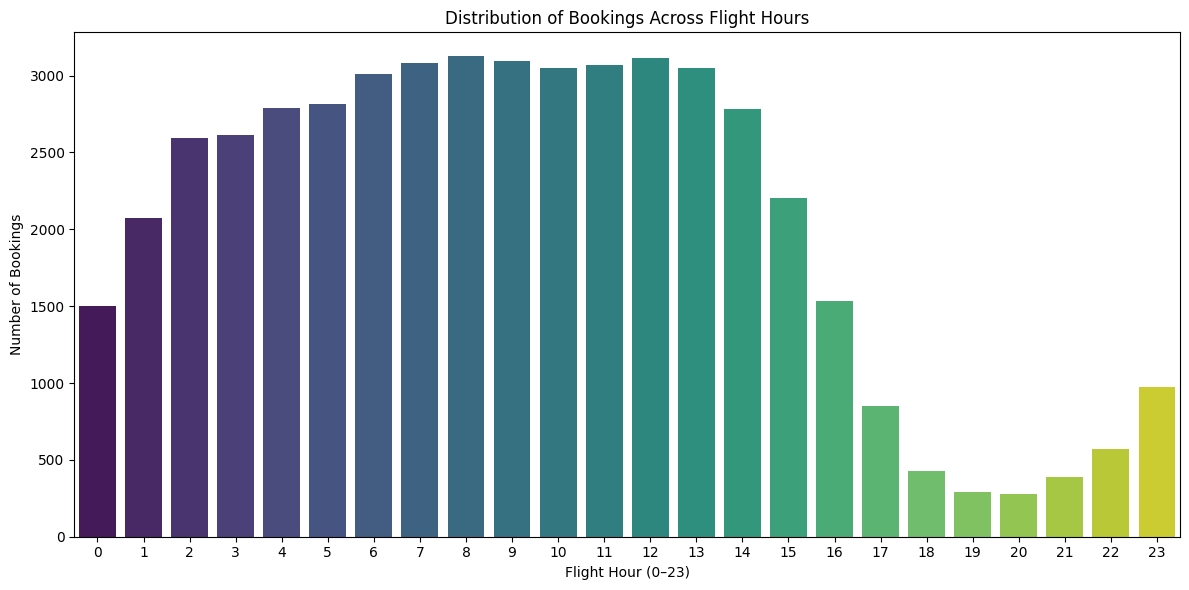

In [54]:
# Get the distribution of bookings across flight hours
flight_hour_counts = df['flight_hour'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=flight_hour_counts.index,
    y=flight_hour_counts.values,
    palette='viridis',
    width=0.8  # default is 0.8; try 0.9 or even 1.0 for thicker bars
)
plt.title('Distribution of Bookings Across Flight Hours')
plt.xlabel('Flight Hour (0–23)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



# Top 10 Most Popular Flight Routes

This bar chart displays the top 10 most popular flight routes based on the booking data. It shows the frequency of bookings for each of these routes, providing insights into the most traveled flight paths in the dataset.

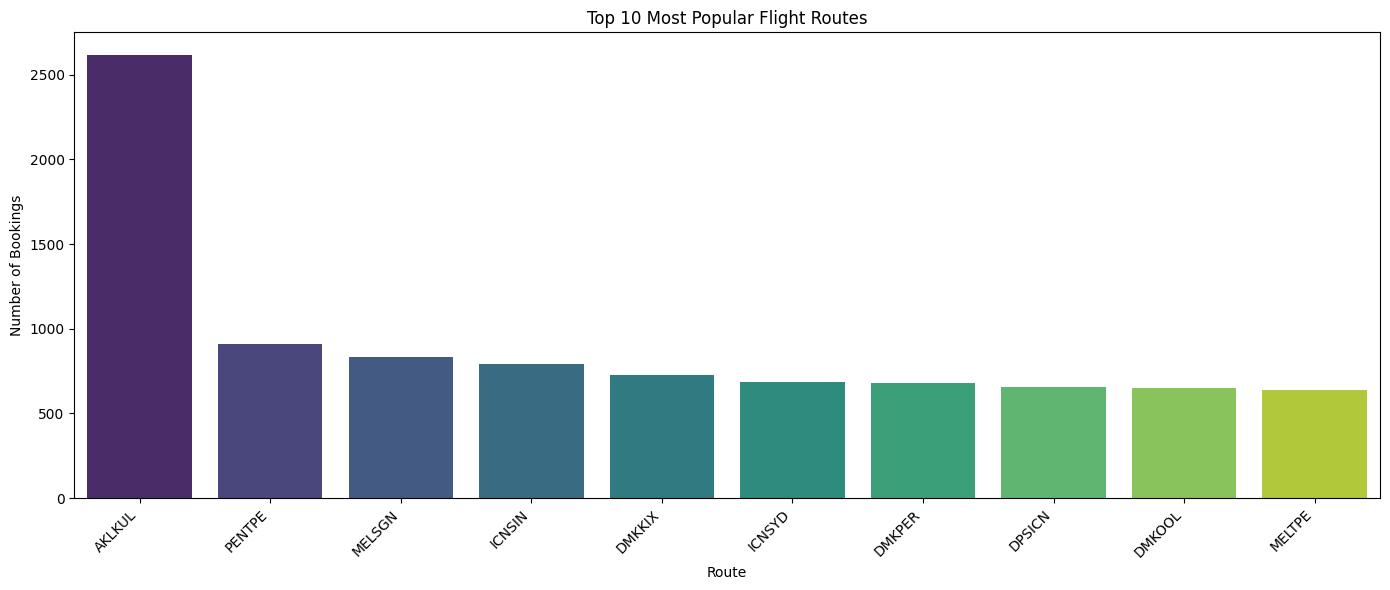

In [55]:
# Get the top 10 most popular routes
top_10_routes = df['route'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    x=top_10_routes.index,
    y=top_10_routes.values,
    palette='viridis',
    width=0.8  # thicker bars
)

plt.title('Top 10 Most Popular Flight Routes')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
